<a href="https://colab.research.google.com/github/Liron-hag/Data_analysis_proj/blob/simple-proj/ProjData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

In [297]:
# load
data = pd.read_csv("train.csv")
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

#split to train and test
X_train_raw ,X_val_raw ,y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True)
print(f'X_train_raw.shape: {X_train_raw.shape}, y_train.shape: {y_train.shape}, \
X_validation_raw.shape: {X_val_raw.shape}, y_validation.shape: {y_val.shape}')


X.shape: (55462, 16), y.shape: (55462,)
X_train_raw.shape: (44369, 16), y_train.shape: (44369,), X_validation_raw.shape: (11093, 16), y_validation.shape: (11093,)


In [298]:
data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,T,young,No,developer,BA/BSc,Male,No,7.0,6.868416,2.0,aa,NaN,United States of America,80000.0,NaN,1
55458,57832,T,NaN,NaN,developer,MA/MSc,Male,No,22.0,2.030205,20.0,ca,178.055004,Brazil,149568.0,Bash/Shell;C++;Java;JavaScript;PHP;SQL;Docker;...,1
55459,47358,T,old,No,developer,BA/BSc,Male,No,35.0,1.473015,35.0,aa,182.771752,United States of America,NaN,Bash/Shell;HTML/CSS;JavaScript;Python;SQL;Type...,1
55460,36055,T,young,NaN,developer,BA/BSc,Male,No,6.0,-0.883305,3.0,ww,180.147589,United States of America,105000.0,C;HTML/CSS;Java;JavaScript;Node.js;TypeScript;...,1


Nan fill options:

work in past - if years of experiance not 0 so True. Else if prev salary not Nan so True.

age - need to find the years of experiance that 50% are young and 50% old. than each one that his expirience is higher is old.

disability - we can save on the proportion that we already have.

is_dev - we can check if dev salary is higher then other.

aducation, sex, mental issues - save the proportion

years of expirience - oposite of age. we can include salary site too.

A,B,D - save on median

C - save on proportion

cuntry - save on proportion

salary - combination of age, years of experiance and dev




In [299]:
# prompt: how many Nan in every col?

nan_counts = data.isna().sum(axis=0)
print(nan_counts)


ID                         0
worked_in_the_past      1765
age_group               2540
disability              3681
is_dev                  2090
education               3016
sex                     3228
mental_issues           2415
years_of_experience     2564
A                       2135
B                       3535
C                       3002
D                       2619
country                 2019
prev_salary             2664
stack_experience       14042
label                      0
dtype: int64


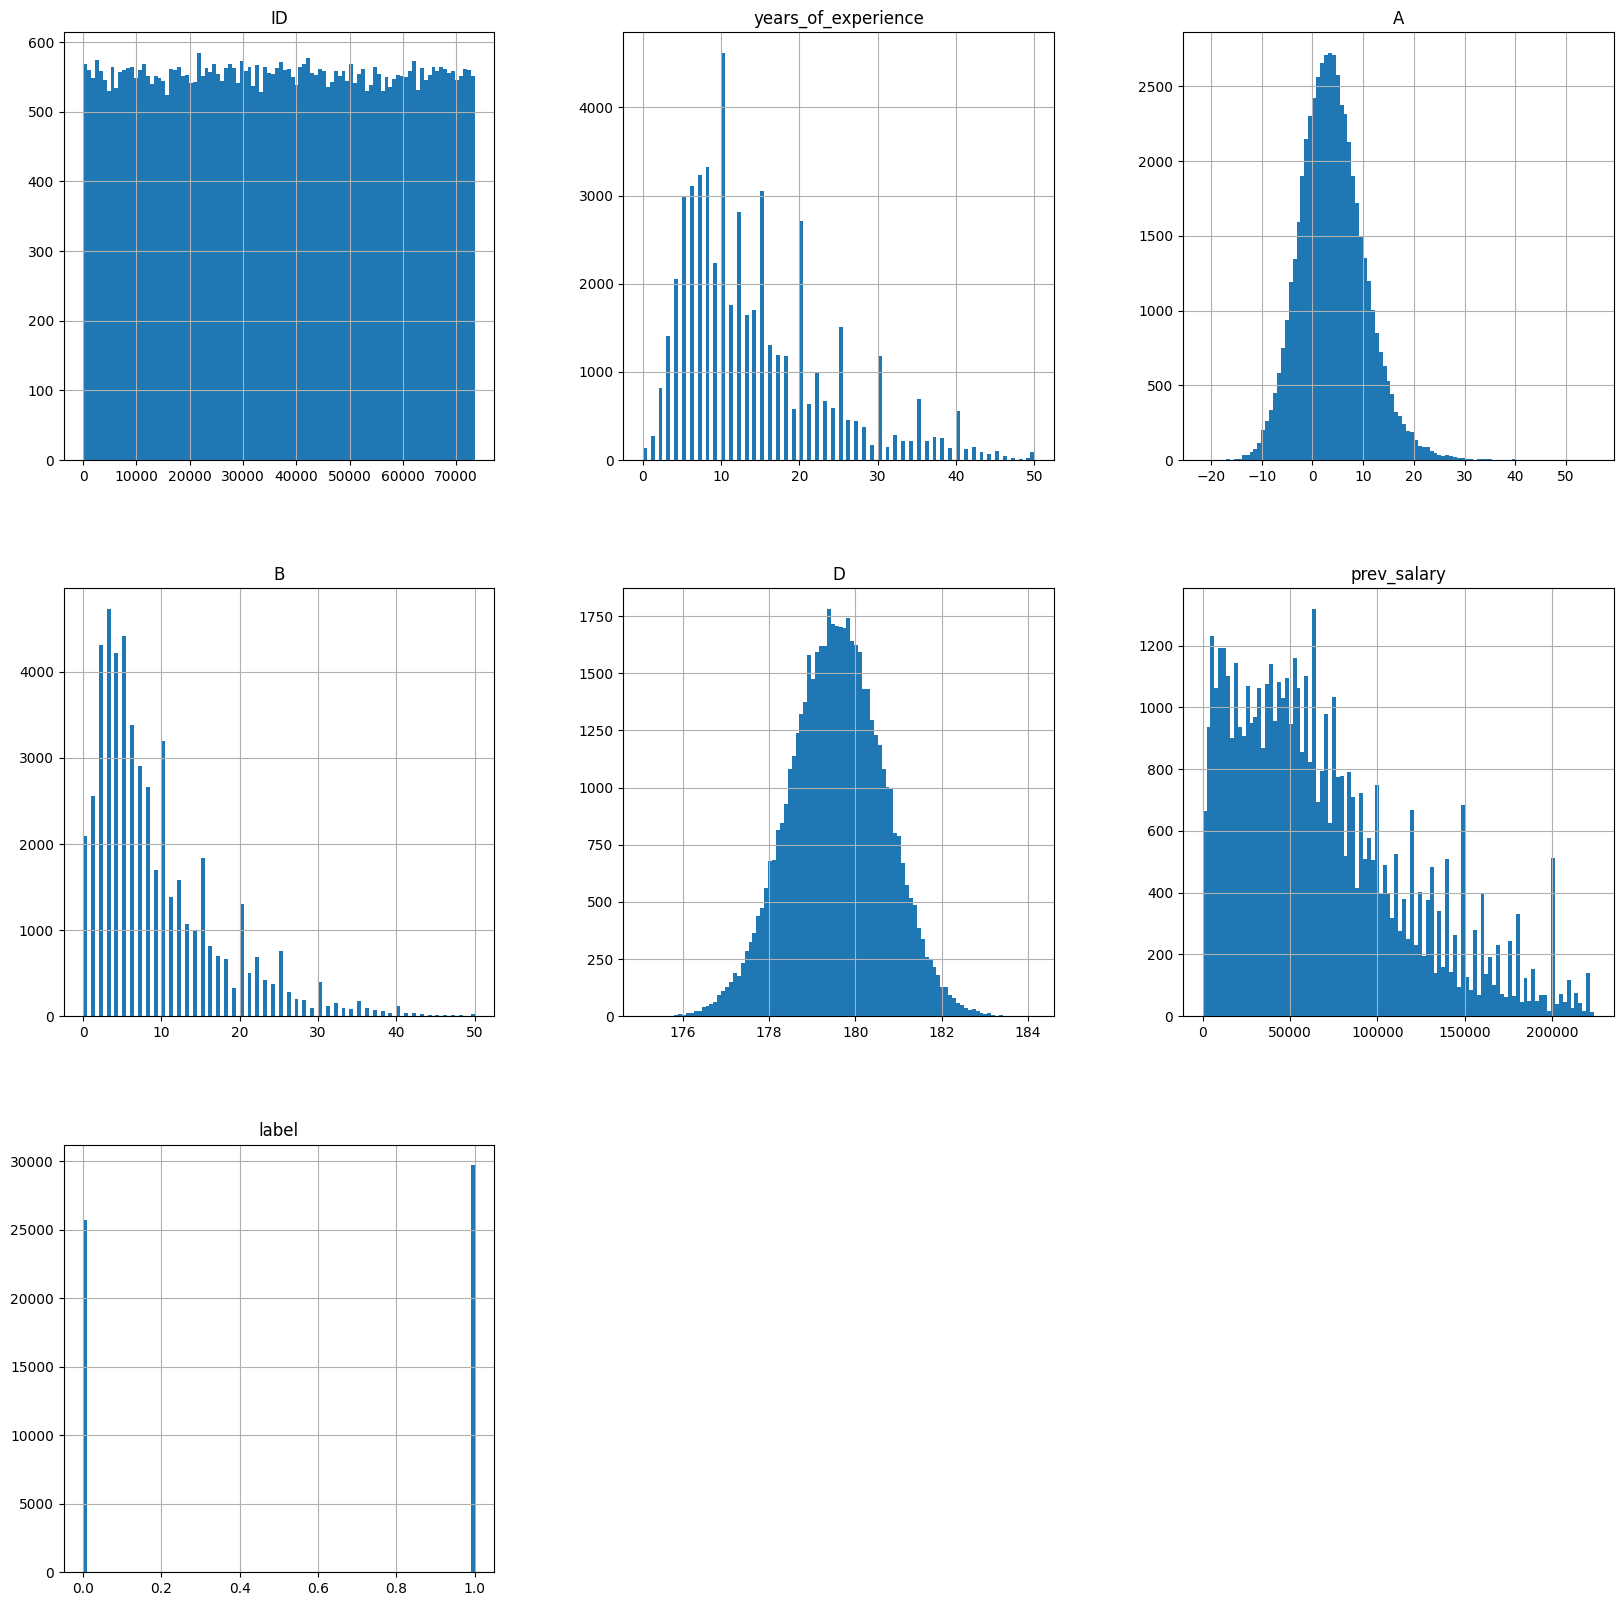

In [300]:
# prompt: how every col distrabution?

data.hist(bins = 100, figsize = (20,20))
plt.show()


Simple Nan filling

In [301]:
# prompt: I need to fulfill all the null in prev salary col by the meidian

data["worked_in_the_past"] = data["worked_in_the_past"].fillna(0)

data["age_group"] = data["age_group"].fillna(0)

data["disability"] = data["disability"].fillna(0)

data["is_dev"] = data["is_dev"].fillna(0)

data["education"] = data["education"].fillna(1)

data["sex"] = data["sex"].fillna(0)

data["mental_issues"] = data["mental_issues"].fillna(0)

data["years_of_experience"] = data["years_of_experience"].fillna(data["years_of_experience"].median())

data["A"] = data["A"].fillna(data["A"].median())

data["B"] = data["B"].fillna(data["B"].median())

data["C"] = data["C"].fillna('aa')

data["D"] = data["D"].fillna(data["D"].median())

data["country"] = data["country"].fillna('Israel')

data["prev_salary"] = data["prev_salary"].fillna(data["prev_salary"].median())

data["stack_experience"] = data["stack_experience"].fillna(0)


nan_counts = data.isna().sum(axis=0)
print(nan_counts)



ID                     0
worked_in_the_past     0
age_group              0
disability             0
is_dev                 0
education              0
sex                    0
mental_issues          0
years_of_experience    0
A                      0
B                      0
C                      0
D                      0
country                0
prev_salary            0
stack_experience       0
label                  0
dtype: int64


Here we will change all the category data to Binary or numeric data

In [302]:
# prompt: replace in col "age group" - old to 1 and young to 0, remove Nan

def replace_age_to_binary(data):
  data['age_group'].replace(['old','young'],[1,0],inplace=True)
  return data

# T = 1, F = 0
def replace_worked_in_past_to_binary(data):
  data['worked_in_the_past'].replace(['T','F'],[1,0],inplace=True)
  return data

# Yes = 1, No = 0
def replace_diability_to_binary(data):
  data['disability'].replace(['Yes','No'],[1,0],inplace=True)
  return data

# developer = 1, non-developer = 0
def replace_is_dev_to_binary(data):
  data['is_dev'].replace(['developer','non-developer'],[1,0],inplace=True)
  return data

# Male = 1, Female = 0
def replace_sex_to_binary(data):
  data['sex'].replace(['Other','Male','Female'],[2,1,0],inplace=True)
  return data

# education: MA/MSc = 1, BA/BSc = 2, Phd = 3, other = 4, High school = 5
def replace_education_to_binary(data):
  data['education'].replace(['MA/MSc','BA/BSc','Phd','other','High school'],[1,2,3,4,5],inplace=True)
  return data

# Yes = 1, No = 0
def replace_mental_to_binary(data):
  data['mental_issues'].replace(['Yes','No'],[1,0],inplace=True)
  return data

def replace_C_to_numeric(data):
  data['C'].replace(['aa','ww','br','mn','rhz','ca','hr'],[1,2,3,4,5,6,7],inplace=True)
  return data

# just fot first test
def replace_country_to_numeric(data):
  data['country'].replace('0',inplace=True)
  return data

def replace_category_to_binary(data):
  data = replace_age_to_binary(data)
  data = replace_worked_in_past_to_binary(data)
  data = replace_diability_to_binary(data)
  data = replace_is_dev_to_binary(data)
  data = replace_sex_to_binary(data)
  data = replace_education_to_binary(data)
  data = replace_mental_to_binary(data)
  data = replace_C_to_numeric(data)
  data = replace_country_to_numeric(data)
  return data


def string_to_int(data):
  data = data['A'].astype(int)
  data = data['D'].astype(int)
  return data
data = replace_category_to_binary(data)



In [303]:
# prompt: count how many strings that split by ; there are in a cell on col 'stack_experience'


def count_strings_in_cell(cell):
  cell = str(cell)
  return len(cell.split(';'))

data['stack_experience'] = data['stack_experience'].apply(count_strings_in_cell)

data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1,0,0,1,1,1,0,13.0,-1.093080,1.0,1,180.984266,Israel,67104.0,12,1
1,38314,1,0,0,0,4,1,1,7.0,5.444533,7.0,5,180.677533,United States of America,101000.0,7,0
2,5209,1,1,0,1,4,1,1,25.0,1.727255,15.0,1,177.746162,United States of America,70000.0,12,0
3,54165,1,0,0,1,4,1,0,10.0,17.804302,7.0,1,176.952584,Spain,40956.0,17,0
4,42213,1,0,0,1,2,1,0,12.0,-8.679091,4.0,7,179.393259,Canada,101509.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1,0,0,1,2,1,0,7.0,6.868416,2.0,1,179.584091,United States of America,80000.0,1,1
55458,57832,1,0,0,1,1,1,0,22.0,2.030205,20.0,6,178.055004,Brazil,149568.0,25,1
55459,47358,1,1,0,1,2,1,0,35.0,1.473015,35.0,1,182.771752,United States of America,57660.0,21,1
55460,36055,1,0,0,1,2,1,0,6.0,-0.883305,3.0,2,180.147589,United States of America,105000.0,14,1


Standartization between 0 to 1

In [304]:
# prompt: make a standartization function for each col

def standardize_column(data, column_name):
  """
  Standardize a column in a DataFrame by subtracting the mean and dividing by the standard deviation.

  Args:
    data: The DataFrame containing the column.
    column_name: The name of the column to standardize.

  Returns:
    The DataFrame with the standardized column.
  """

  # Calculate the mean and standard deviation of the column.
  mean = data[column_name].mean()
  std = data[column_name].std()

  # Standardize the column.
  data[column_name] = (data[column_name] - mean) / std

  return data

data = standardize_column(data, 'prev_salary')
data = standardize_column(data, 'years_of_experience')
data = standardize_column(data, 'stack_experience')
data = standardize_column(data, 'A')
data = standardize_column(data, 'B')
data = standardize_column(data, 'D')

data

,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,1,0,0,1,1,1,0,-0.121134,-0.810672,-1.028808,1,1.314260,Israel,-0.004316,0.208709,1
1,38314,1,0,0,0,4,1,1,-0.774464,0.232254,-0.252062,5,1.027090,United States of America,0.695623,-0.404403,0
2,5209,1,1,0,1,4,1,1,1.185528,-0.360752,0.783599,1,-1.717323,United States of America,0.055485,0.208709,0
3,54165,1,0,0,1,4,1,0,-0.447799,2.203970,-0.252062,1,-2.460288,Spain,-0.544262,0.821821,0
4,42213,1,0,0,1,2,1,0,-0.230022,-2.020845,-0.640435,7,-0.175275,Canada,0.706134,-0.527025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1,0,0,1,2,1,0,-0.774464,0.459402,-0.899350,1,0.003385,United States of America,0.261981,-1.140137,1
55458,57832,1,0,0,1,1,1,0,0.858862,-0.312424,1.430887,6,-1.428178,Brazil,1.698533,1.802800,1
55459,47358,1,1,0,1,2,1,0,2.274412,-0.401310,3.372751,1,2.987743,United States of America,-0.199331,1.312310,1
55460,36055,1,0,0,1,2,1,0,-0.883353,-0.777207,-0.769893,2,0.530945,United States of America,0.778222,0.453954,1


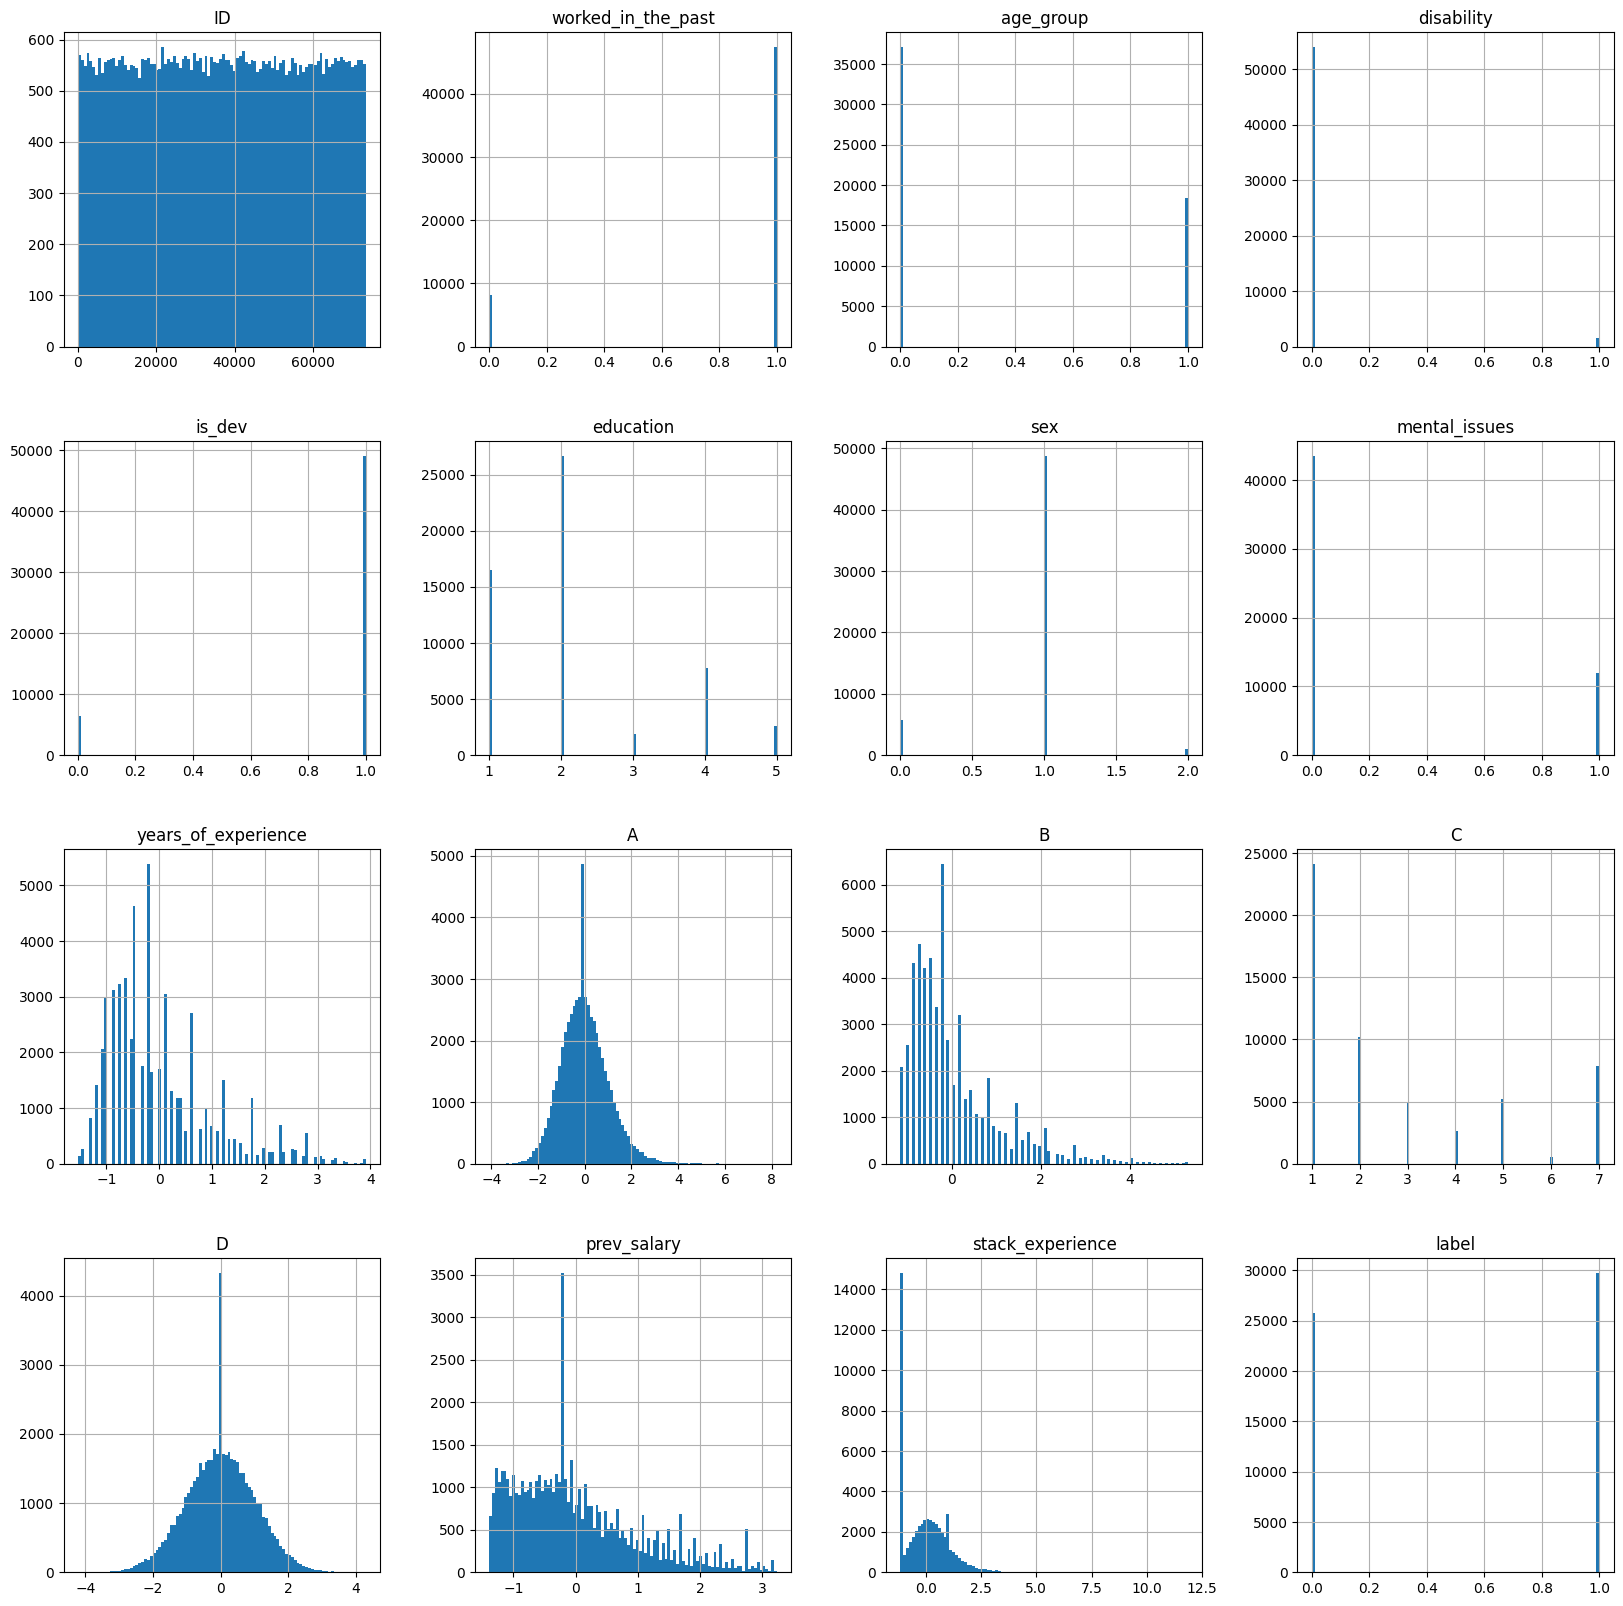

In [305]:
data.hist(bins = 100, figsize = (20,20))
plt.show()

Model building

In [306]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [307]:
clf = LogisticRegression()
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.1,1,10],
    'solver': ['saga']
}
optimizer = GridSearchCV(clf, param_grid,scoring='roc_auc',n_jobs=4)

data = data[['ID','worked_in_the_past','age_group','disability','education','is_dev','sex','mental_issues','prev_salary','years_of_experience','stack_experience','A','B','C','D','label']]

data

,ID,worked_in_the_past,age_group,disability,education,is_dev,sex,mental_issues,prev_salary,years_of_experience,stack_experience,A,B,C,D,label
0,65168,1,0,0,1,1,1,0,-0.004316,-0.121134,0.208709,-0.810672,-1.028808,1,1.314260,1
1,38314,1,0,0,4,0,1,1,0.695623,-0.774464,-0.404403,0.232254,-0.252062,5,1.027090,0
2,5209,1,1,0,4,1,1,1,0.055485,1.185528,0.208709,-0.360752,0.783599,1,-1.717323,0
3,54165,1,0,0,4,1,1,0,-0.544262,-0.447799,0.821821,2.203970,-0.252062,1,-2.460288,0
4,42213,1,0,0,2,1,1,0,0.706134,-0.230022,-0.527025,-2.020845,-0.640435,7,-0.175275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55457,64649,1,0,0,2,1,1,0,0.261981,-0.774464,-1.140137,0.459402,-0.899350,1,0.003385,1
55458,57832,1,0,0,1,1,1,0,1.698533,0.858862,1.802800,-0.312424,1.430887,6,-1.428178,1
55459,47358,1,1,0,2,1,1,0,-0.199331,2.274412,1.312310,-0.401310,3.372751,1,2.987743,1
55460,36055,1,0,0,2,1,1,0,0.778222,-0.883353,0.453954,-0.777207,-0.769893,2,0.530945,1


In [308]:
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

#split to train and test
X_train ,X_val ,y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True)
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, \
X_validation.shape: {X_val.shape}, y_validation.shape: {y_val.shape}')



X.shape: (55462, 15), y.shape: (55462,)
X_train.shape: (44369, 15), y_train.shape: (44369,), X_validation.shape: (11093, 15), y_validation.shape: (11093,)


In [309]:
optimizer.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='roc_auc')

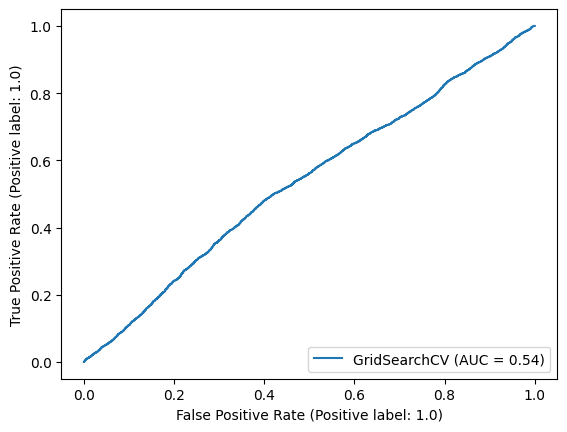

In [310]:
RocCurveDisplay.from_estimator(optimizer, X_val, y_val)

Random Forest

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import plot_tree

Sklearn Random Forest auc: 0.7735508879473542


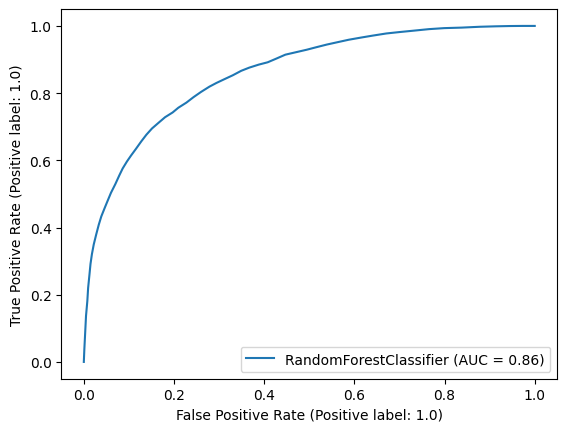

In [312]:
rf = RandomForestClassifier(n_estimators=60, random_state=2, criterion='entropy')
rf.fit(X_train, y_train)
print("Sklearn Random Forest auc:", rf.score(X_val, y_val))
RocCurveDisplay.from_estimator(rf, X_val, y_val)